# Deep Learning Playground

This notebook demonstrates:
1. **MLP** for tabular data
2. **CNN** for image data
3. **Simple RNN**, **LSTM**, and **GRU** for sequence data

Feel free to adjust hyper‑parameters and architectures to deepen your understanding!

In [62]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, tensorflow as tf
from tensorflow.keras import layers, models
from keras.datasets import mnist, cifar10
from keras.src.utils import to_categorical

print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.19.0


## Part 1 – MLP on Titanic

In [63]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic = titanic.drop(['Cabin','Ticket','Name','Embarked'], axis=1)
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Sex'] = titanic['Sex'].map({'male':0,'female':1})
titanic = titanic.dropna()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = titanic[['Pclass','Sex','Age','Fare']].values
y = titanic['Survived'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [64]:
mlp = models.Sequential([layers.Input(shape=(4,)),layers.Dense(32, activation='relu'),
                          layers.Dense(16, activation='relu'),
                          layers.Dense(1, activation='sigmoid')])
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp.summary()

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_92 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

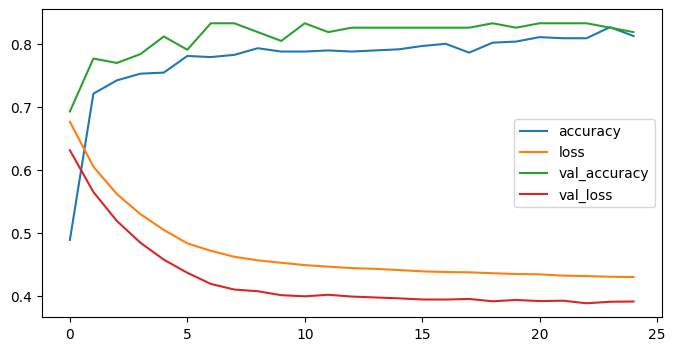

Test accuracy: 0.7932960987091064


In [65]:
hist = mlp.fit(X_train, y_train, epochs=25, batch_size=32,
                    validation_split=0.2, verbose=0)
pd.DataFrame(hist.history).plot(figsize=(8,4)); plt.show()
print('Test accuracy:', mlp.evaluate(X_test, y_test, verbose=0)[1])

## Part 2 – CNN on MNIST

In [66]:
(X_train_m, y_train_m), (X_test_m, y_test_m) = tf.keras.datasets.mnist.load_data()
X_train_m = X_train_m.astype('float32')/255.
X_test_m = X_test_m.astype('float32')/255.
X_train_m = X_train_m[...,None]
X_test_m = X_test_m[...,None]

In [67]:
cnn = models.Sequential([layers.Input(shape=(28,28,1)),
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

C:\Users\SDK Marshall\PycharmProjects\Cours-Data-Science-M2\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
cnn.fit(X_train_m, y_train_m, epochs=5, batch_size=128,
        validation_split=0.1, verbose=2)
print('Test accuracy:', cnn.evaluate(X_test_m, y_test_m, verbose=0)[1])

Epoch 1/5
422/422 - 5s - 13ms/step - accuracy: 0.9336 - loss: 0.2272 - val_accuracy: 0.9827 - val_loss: 0.0626
Epoch 2/5
422/422 - 5s - 11ms/step - accuracy: 0.9816 - loss: 0.0589 - val_accuracy: 0.9853 - val_loss: 0.0511
Epoch 3/5
422/422 - 5s - 11ms/step - accuracy: 0.9866 - loss: 0.0417 - val_accuracy: 0.9848 - val_loss: 0.0526
Epoch 4/5
422/422 - 5s - 11ms/step - accuracy: 0.9903 - loss: 0.0308 - val_accuracy: 0.9890 - val_loss: 0.0460
Epoch 5/5
422/422 - 5s - 13ms/step - accuracy: 0.9924 - loss: 0.0249 - val_accuracy: 0.9845 - val_loss: 0.0523
Test accuracy: 0.9860000014305115


## Part 3 – RNNs for Time Series

We'll forecast a sine wave using previous 50 time‑steps.

In [69]:
t = np.linspace(0, 100, 10000)
series = np.sin(t)
window=50
X_seq, y_seq = [], []
for i in range(len(series)-window):
    X_seq.append(series[i:i+window])
    y_seq.append(series[i+window])
X_seq, y_seq = np.array(X_seq)[...,None], np.array(y_seq)
split=int(0.8*len(X_seq))
X_train_s, X_test_s = X_seq[:split], X_seq[split:]
y_train_s, y_test_s = y_seq[:split], y_seq[split:]
print(X_train_s.shape)

(7960, 50, 1)


### Simple RNN

In [70]:
rnn = models.Sequential([layers.Input(shape=(window,1)),layers.SimpleRNN(32),
                        layers.Dense(1)])
rnn.compile(optimizer='adam', loss='mse')
rnn.summary()
rnn.fit(X_train_s, y_train_s, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
print('RNN Test MSE:', rnn.evaluate(X_test_s, y_test_s, verbose=0))

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
56/56 - 1s - 25ms/step - loss: 0.1216 - val_loss: 9.2783e-04
Epoch 2/5
56/56 - 0s - 5ms/step - loss: 5.3942e-04 - val_loss: 2.1334e-04
Epoch 3/5
56/56 - 0s - 5ms/step - loss: 1.6491e-04 - val_loss: 1.1129e-04
Epoch 4/5
56/56 - 0s - 5ms/step - loss: 1.0731e-04 - val_loss: 7.9436e-05
Epoch 5/5
56/56 - 0s - 5ms/step - loss: 7.9891e-05 - val_loss: 6.2259e-05
RNN Test MSE: 7.169786840677261e-05


### LSTM

In [71]:
lstm = models.Sequential([layers.Input(shape=(window,1)),layers.LSTM(64),
                         layers.Dense(1)])
lstm.compile(optimizer='adam', loss='mse')
lstm.summary()
lstm.fit(X_train_s, y_train_s, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
print('LSTM Test MSE:', lstm.evaluate(X_test_s, y_test_s, verbose=0))

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
56/56 - 2s - 38ms/step - loss: 0.0506 - val_loss: 0.0029
Epoch 2/5
56/56 - 1s - 19ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 3/5
56/56 - 1s - 19ms/step - loss: 9.9553e-04 - val_loss: 6.4598e-04
Epoch 4/5
56/56 - 1s - 18ms/step - loss: 3.6818e-04 - val_loss: 2.4416e-04
Epoch 5/5
56/56 - 1s - 19ms/step - loss: 1.2185e-04 - val_loss: 4.1246e-05
LSTM Test MSE: 3.731572724063881e-05


### GRU

In [72]:
gru = models.Sequential([layers.Input(shape=(window, 1 ,)),layers.GRU(64),
                        layers.Dense(1)])
gru.compile(optimizer='adam', loss='mse')
gru.summary()
gru.fit(X_train_s, y_train_s, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
print('GRU Test MSE:', gru.evaluate(X_test_s, y_test_s, verbose=0))

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
56/56 - 2s - 39ms/step - loss: 0.1694 - val_loss: 0.0033
Epoch 2/5
56/56 - 1s - 18ms/step - loss: 0.0010 - val_loss: 6.4201e-04
Epoch 3/5
56/56 - 1s - 18ms/step - loss: 6.2462e-04 - val_loss: 5.4774e-04
Epoch 4/5
56/56 - 1s - 18ms/step - loss: 5.5598e-04 - val_loss: 5.4610e-04
Epoch 5/5
56/56 - 1s - 18ms/step - loss: 4.9909e-04 - val_loss: 4.4173e-04
GRU Test MSE: 0.0004651193739846349


## Visualizing MNIST Data

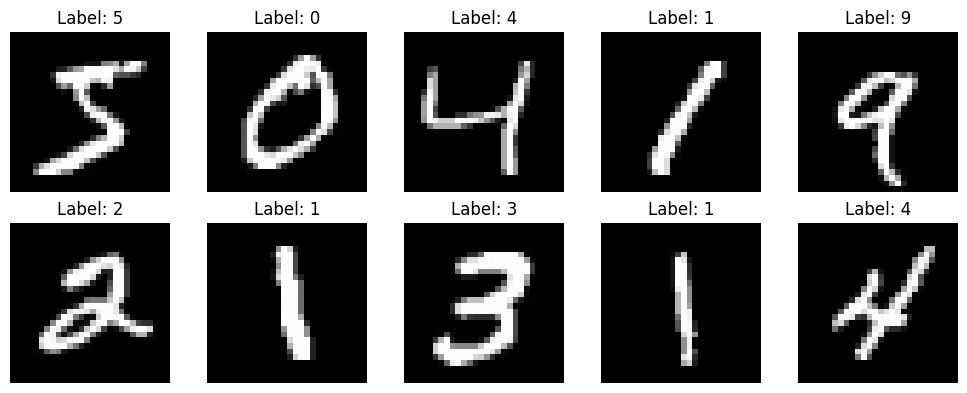

In [73]:
(X_train, y_train), (_, _) = mnist.load_data()

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

## Visualizing Model Predictions

In [74]:
def plot_predictions(images, true_labels, pred_labels, num=10):
    import numpy as np
    plt.figure(figsize=(15, 4))
    for i in range(num):
        plt.subplot(2, num//2, i+1)
        plt.imshow(images[i], cmap='gray')
        color = 'green' if true_labels[i] == pred_labels[i] else 'red'
        plt.title(f"T: {true_labels[i]}, P: {pred_labels[i]}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

## Exercises

#### 1. Change the Activation Function
Try using `tanh`, `sigmoid`, or `leaky_relu` instead of `relu`. How does it affect training?

#### 2. Add Dropout
Add `Dropout(0.3)` after dense or convolutional layers. Does it help reduce overfitting?

#### 3. Train a CNN on a New Image Dataset
Choose a public dataset: **CIFAR-10**,  and train a CNN model. You can load it using Keras:
```python
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```

### 4. Train an LSTM for Text Processing
Choose a small text dataset (e.g., IMDB movie reviews from Keras).
👉 Tokenize the data, pad the sequences, and use an `Embedding` + `LSTM` model to classify text.

```python
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)
```
👉 Build and train a sequential model using `Embedding` + `LSTM` + `Dense`.

---
 *Tip:* For each dataset, remember to normalize inputs, convert labels to one-hot encoding if needed, and evaluate accuracy and loss.


In [75]:
print("Using a Different Activation Functions")

X = titanic[['Pclass','Sex','Age','Fare']].values
y = titanic['Survived'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Test different activation functions
activations = ['relu', 'tanh', 'sigmoid']
results = {}

for activation in activations:
    print(f"\nTesting {activation} activation...")

    model = models.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train with reduced epochs for comparison
    history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                       validation_split=0.2, verbose=0)

    # Evaluate
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    results[activation] = {
        'test_accuracy': test_acc,
        'final_train_loss': history.history['loss'][-1],
        'final_val_loss': history.history['val_loss'][-1]
    }

    print(f"Test Accuracy: {test_acc:.4f}")

# Compare results
print(f"\n{'Activation':<10} {'Test Acc':<10} {'Train Loss':<12} {'Val Loss':<10}")
for act, res in results.items():
    print(f"{act:<10} {res['test_accuracy']:<10.4f} {res['final_train_loss']:<12.4f} {res['final_val_loss']:<10.4f}")


Using a Different Activation Functions

Testing relu activation...
Test Accuracy: 0.7877

Testing tanh activation...
Test Accuracy: 0.8045

Testing sigmoid activation...
Test Accuracy: 0.7933

Activation Test Acc   Train Loss   Val Loss  
relu       0.7877     0.4367       0.4052    
tanh       0.8045     0.4358       0.3938    
sigmoid    0.7933     0.4310       0.3960    


In [77]:
print("Using Dropout")

# Model without dropout
model_no_dropout = models.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Model with dropout
model_with_dropout = models.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

models_dropout = [
    ("Without Dropout", model_no_dropout),
    ("With Dropout", model_with_dropout)
]

dropout_results = {}

for name, model in models_dropout:
    print(f"\nTraining {name}...")
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=30, batch_size=32,
                       validation_split=0.2, verbose=0)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    dropout_results[name] = {
        'history': history,
        'test_accuracy': test_acc,
        'overfitting': history.history['loss'][-1] - history.history['val_loss'][-1]
    }

    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Overfitting (train-val loss): {dropout_results[name]['overfitting']:.4f}")

Using Dropout

Training Without Dropout...
Test Accuracy: 0.8380
Overfitting (train-val loss): 0.0369

Training With Dropout...
Test Accuracy: 0.7933
Overfitting (train-val loss): 0.0430


In [78]:
print("CNN on CIFAR-10")

# Load CIFAR-10 data
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = cifar10.load_data()

# Normalize pixel values
X_train_cifar = X_train_cifar.astype('float32') / 255.0
X_test_cifar = X_test_cifar.astype('float32') / 255.0

# Convert labels to categorical
y_train_cifar = to_categorical(y_train_cifar, 10)
y_test_cifar = to_categorical(y_test_cifar, 10)

print(f"CIFAR-10 data shape: {X_train_cifar.shape}")
print(f"Number of classes: {y_train_cifar.shape[1]}")

# Build CNN model for CIFAR-10
cifar_cnn = models.Sequential([
    # First Conv Block
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Second Conv Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Third Conv Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    # Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

cifar_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nCIFAR-10 CNN Architecture:")
cifar_cnn.summary()

# Train the model (reduced epochs for demo)
print("\nTraining CIFAR-10 CNN...")
cifar_history = cifar_cnn.fit(
    X_train_cifar, y_train_cifar,
    batch_size=32,
    epochs=5,  # Increase for better results
    validation_data=(X_test_cifar, y_test_cifar),
    verbose=1
)

# Evaluate
cifar_test_loss, cifar_test_acc = cifar_cnn.evaluate(X_test_cifar, y_test_cifar, verbose=0)
print(f"\nCIFAR-10 Test Accuracy: {cifar_test_acc:.4f}")

CNN on CIFAR-10
CIFAR-10 data shape: (50000, 32, 32, 3)
Number of classes: 10

CIFAR-10 CNN Architecture:


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737,834 (2.81 MB)

 Trainable params: 736,362 (2.81 MB)

 Non-trainable params: 1,472 (5.75 KB)


Training CIFAR-10 CNN...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.3326 - loss: 2.1292 - val_accuracy: 0.5713 - val_loss: 1.1891
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.5562 - loss: 1.2434 - val_accuracy: 0.6381 - val_loss: 1.0182
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6376 - loss: 1.0438 - val_accuracy: 0.6694 - val_loss: 0.9345
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6784 - loss: 0.9083 - val_accuracy: 0.6487 - val_loss: 1.0108
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7059 - loss: 0.8402 - val_accuracy: 0.7279 - val_loss: 0.7820

CIFAR-10 Test Accuracy: 0.7279


In [80]:
from keras.src.utils import pad_sequences
from keras.datasets import imdb

print("LSTM for Text Processing (IMDB)")

# Load IMDB data
print("Loading IMDB dataset...")
(X_train_imdb, y_train_imdb), (X_test_imdb, y_test_imdb) = imdb.load_data(num_words=10000)

print(f"Training samples: {len(X_train_imdb)}")
print(f"Test samples: {len(X_test_imdb)}")

# Pad sequences
maxlen = 100
X_train_imdb = pad_sequences(X_train_imdb, maxlen=maxlen)
X_test_imdb = pad_sequences(X_test_imdb, maxlen=maxlen)

print(f"Sequence length after padding: {X_train_imdb.shape[1]}")

# Build LSTM model
lstm_model = models.Sequential([
    layers.Embedding(10000, 128),
    layers.LSTM(64, dropout=0.5, recurrent_dropout=0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

lstm_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nIMDB LSTM Architecture:")
lstm_model.summary()

# Train the model
print("\nTraining IMDB LSTM...")
imdb_history = lstm_model.fit(
    X_train_imdb, y_train_imdb,
    batch_size=32,
    epochs=3,  # Increase for better results
    validation_data=(X_test_imdb, y_test_imdb),
    verbose=1
)

# Evaluate
imdb_test_loss, imdb_test_acc = lstm_model.evaluate(X_test_imdb, y_test_imdb, verbose=0)
print(f"\nIMDB Test Accuracy: {imdb_test_acc:.4f}")

LSTM for Text Processing (IMDB)
Loading IMDB dataset...
Training samples: 25000
Test samples: 25000
Sequence length after padding: 100

IMDB LSTM Architecture:


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training IMDB LSTM...
Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - accuracy: 0.6495 - loss: 0.6045 - val_accuracy: 0.8246 - val_loss: 0.3989
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step - accuracy: 0.8284 - loss: 0.4071 - val_accuracy: 0.8350 - val_loss: 0.3826
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.8557 - loss: 0.3503 - val_accuracy: 0.8162 - val_loss: 0.4105

IMDB Test Accuracy: 0.8162


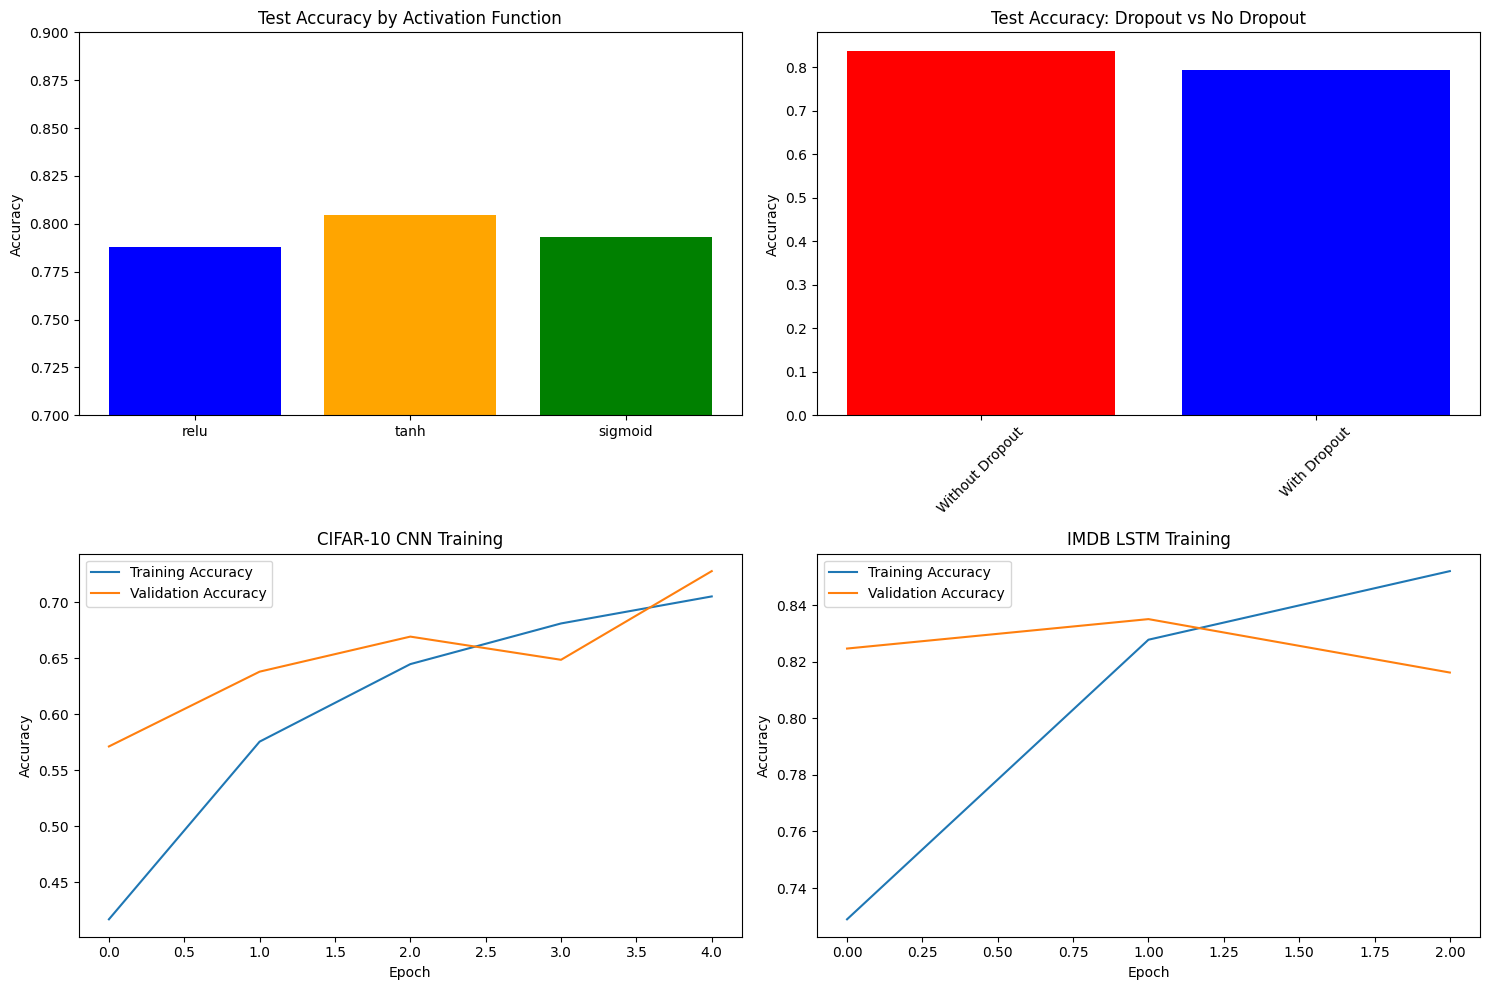

In [81]:
# Plot training histories
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Activation functions comparison
ax1 = axes[0, 0]
activations_acc = [results[act]['test_accuracy'] for act in activations]
ax1.bar(activations, activations_acc, color=['blue', 'orange', 'green'])
ax1.set_title('Test Accuracy by Activation Function')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0.7, 0.9)

# Dropout comparison
ax2 = axes[0, 1]
dropout_names = list(dropout_results.keys())
dropout_acc = [dropout_results[name]['test_accuracy'] for name in dropout_names]
ax2.bar(dropout_names, dropout_acc, color=['red', 'blue'])
ax2.set_title('Test Accuracy: Dropout vs No Dropout')
ax2.set_ylabel('Accuracy')
ax2.tick_params(axis='x', rotation=45)

# CIFAR-10 training history
ax3 = axes[1, 0]
ax3.plot(cifar_history.history['accuracy'], label='Training Accuracy')
ax3.plot(cifar_history.history['val_accuracy'], label='Validation Accuracy')
ax3.set_title('CIFAR-10 CNN Training')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Accuracy')
ax3.legend()

# IMDB training history
ax4 = axes[1, 1]
ax4.plot(imdb_history.history['accuracy'], label='Training Accuracy')
ax4.plot(imdb_history.history['val_accuracy'], label='Validation Accuracy')
ax4.set_title('IMDB LSTM Training')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Accuracy')
ax4.legend()

plt.tight_layout()
plt.show()